In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow


In [4]:
data_steam_games = pd.read_parquet('data_compressed.parquet')

In [5]:
data_steam_games

,genres,title,release_date,discount_price,price
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,2018-01-04,4.49,4.99
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,2018-01-04,0.00,0.00
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,2017-07-24,0.00,0.00
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,2017-12-07,0.83,0.99
4,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,2018-01-04,0.00,3.99
...,...,...,...,...,...
29777,"['Action', 'Adventure', 'Casual', 'Indie']",Kebab it Up!,2018-01-04,1.69,1.99
29778,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,2018-01-04,1.49,1.99
29779,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,2018-01-04,4.24,4.99
29780,"['Indie', 'Racing', 'Simulation']",Russian Roads,2018-01-04,1.39,1.99


In [6]:
data_steam_games.info()
data_steam_games['release_date'] =pd.to_datetime(data_steam_games['release_date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29782 entries, 0 to 29781
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          28548 non-null  object 
 1   title           29782 non-null  object 
 2   release_date    29782 non-null  object 
 3   discount_price  29782 non-null  float64
 4   price           29782 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


In [7]:
data_steam_games['year'] = data_steam_games['release_date'].dt.year
data_steam_games['month'] = data_steam_games['release_date'].dt.month
data_steam_games['day'] = data_steam_games['release_date'].dt.day

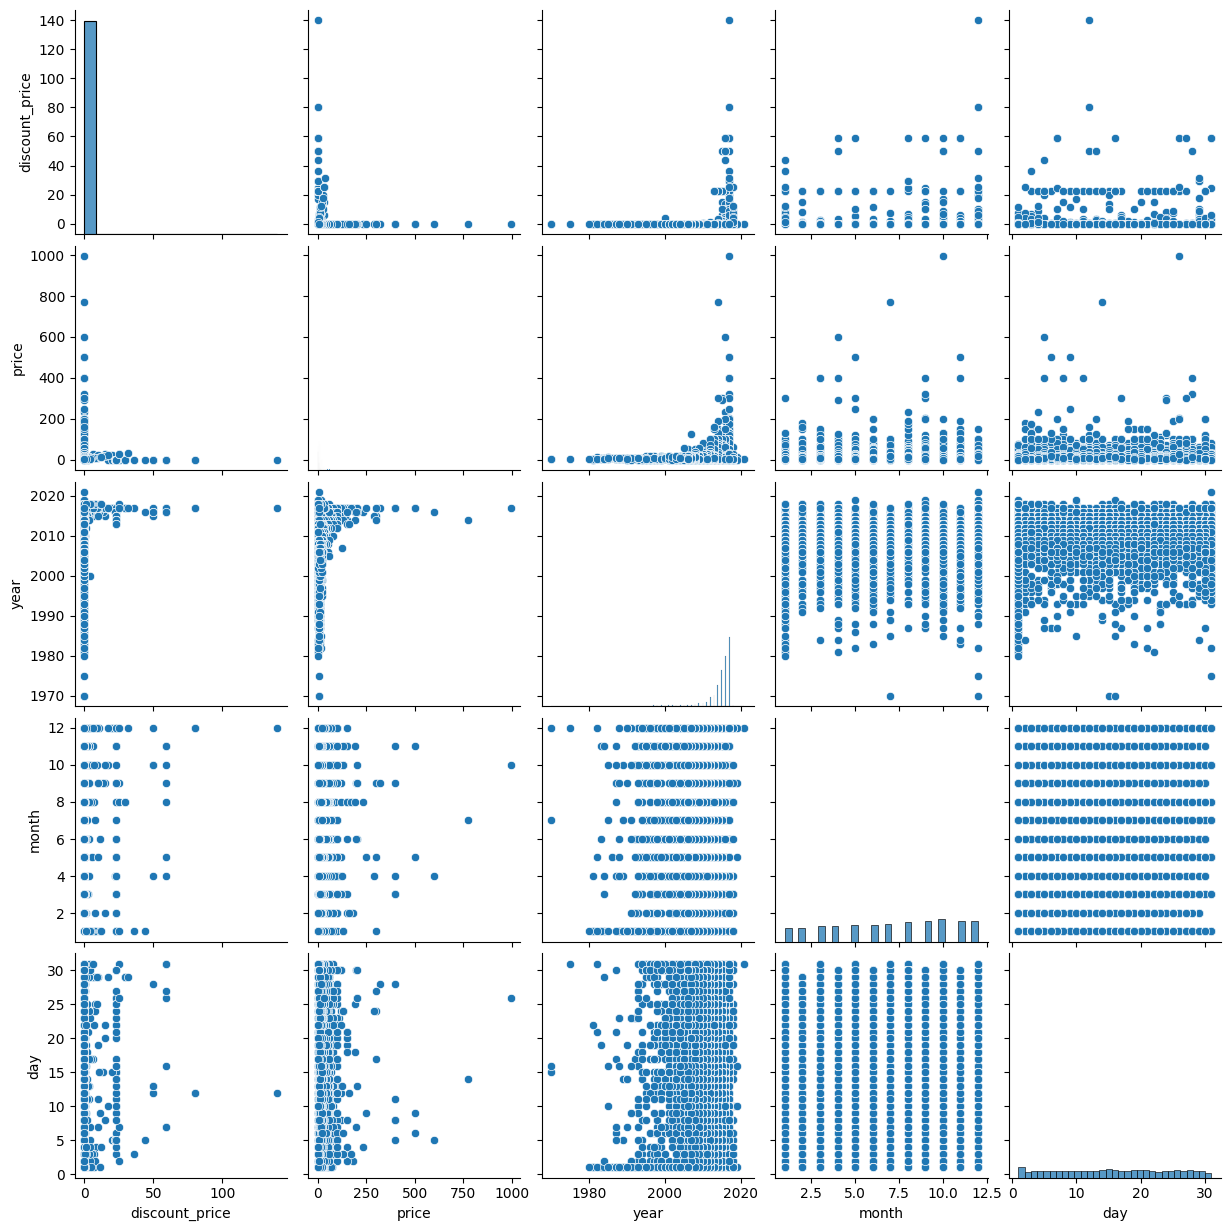

In [8]:
sns.pairplot(data_steam_games)
plt.show()

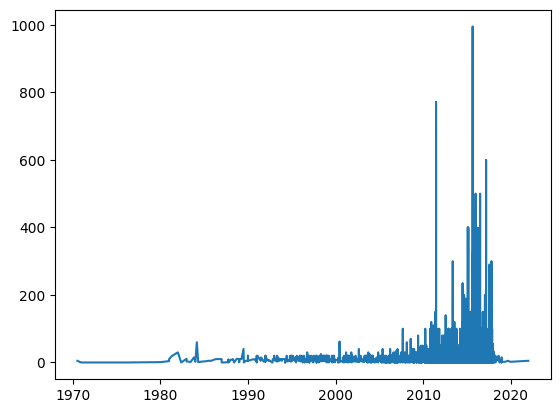

In [9]:
plt.plot(data_steam_games.release_date.sort_values(), data_steam_games.price)
plt.show()

In [10]:
data_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29782 entries, 0 to 29781
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   genres          28548 non-null  object        
 1   title           29782 non-null  object        
 2   release_date    29782 non-null  datetime64[ns]
 3   discount_price  29782 non-null  float64       
 4   price           29782 non-null  float64       
 5   year            29782 non-null  int32         
 6   month           29782 non-null  int32         
 7   day             29782 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(2)
memory usage: 1.5+ MB


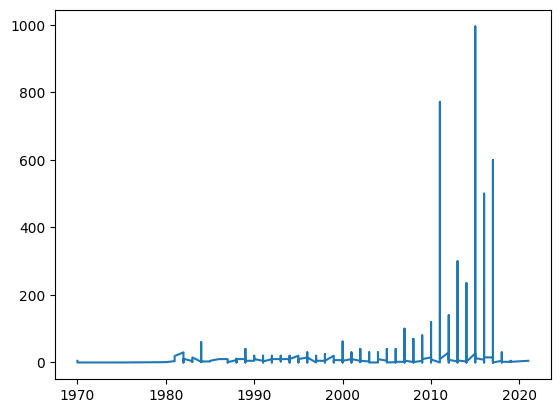

In [11]:
plt.plot(data_steam_games.year.sort_values(), data_steam_games.price)
plt.show()

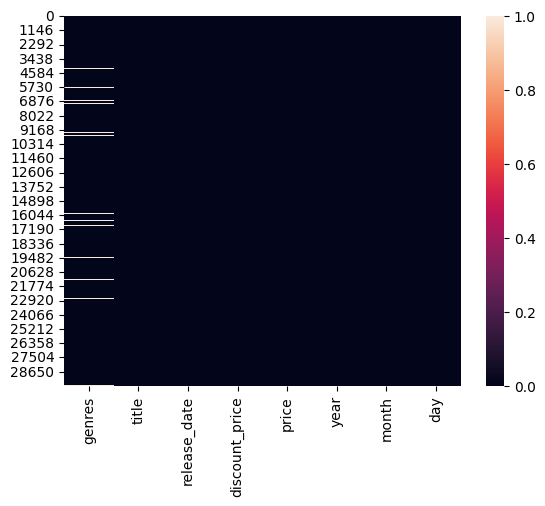

In [12]:
sns.heatmap(data_steam_games.isnull())
plt.show()

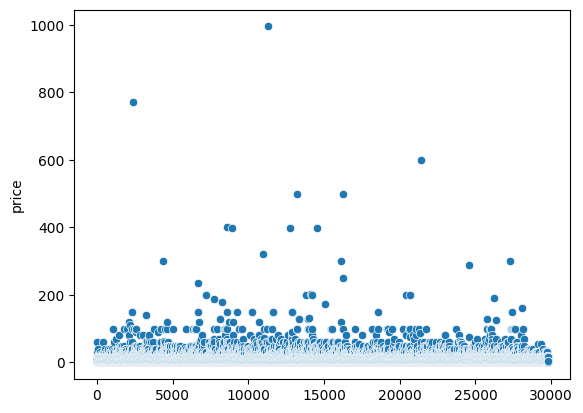

In [13]:
sns.scatterplot(data_steam_games.price)
plt.show()

In [14]:
Q1  = data_steam_games.price.quantile(0.25)
Q3  = data_steam_games.price.quantile(0.75)

IQR = Q3-Q1

BI_Cal = (Q1-1.5*IQR)
BS_Cal = (Q3+1.5*IQR)

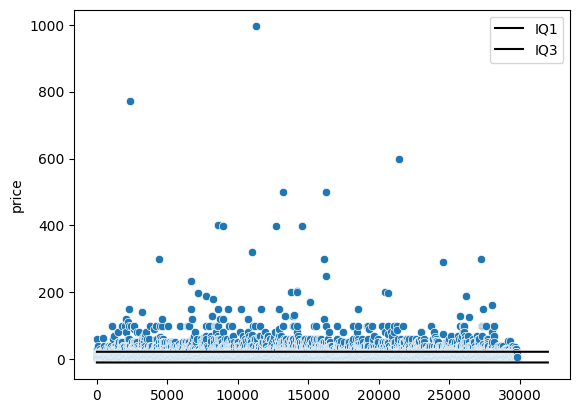

In [15]:
sns.scatterplot(data_steam_games.price)
plt.plot([x for x in range(32000)],[BS_Cal for x in range(32000)], color='black', label='IQ1')
plt.plot([x for x in range(32000)],[BI_Cal for x in range(32000)], color='black',label='IQ3')
plt.legend()
plt.show()

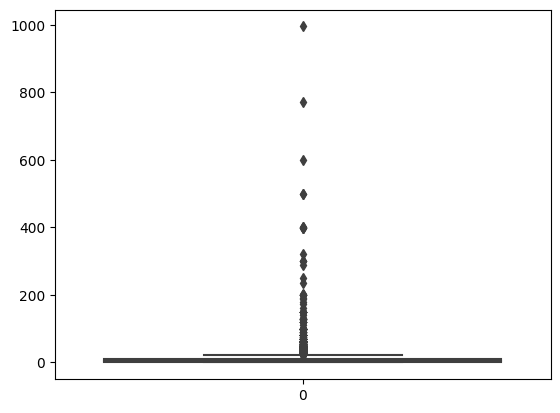

In [16]:
sns.boxplot(data_steam_games.price)
plt.show()

In [17]:
data_steam_games.drop(columns=['app_name'], inplace=True)

KeyError: "['app_name'] not found in axis"

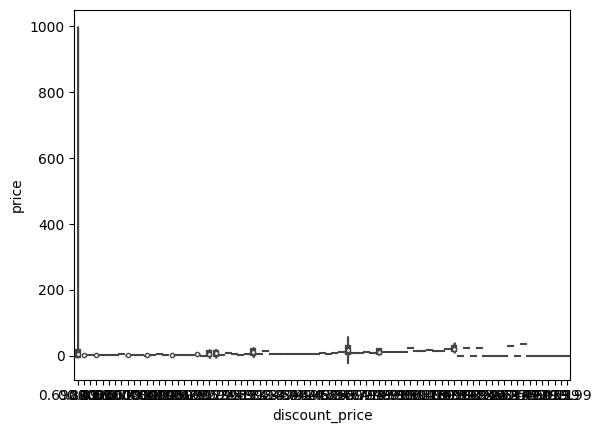

In [ ]:
sns.violinplot(x='discount_price',y='price',data=data_steam_games,split=True)
plt.show()

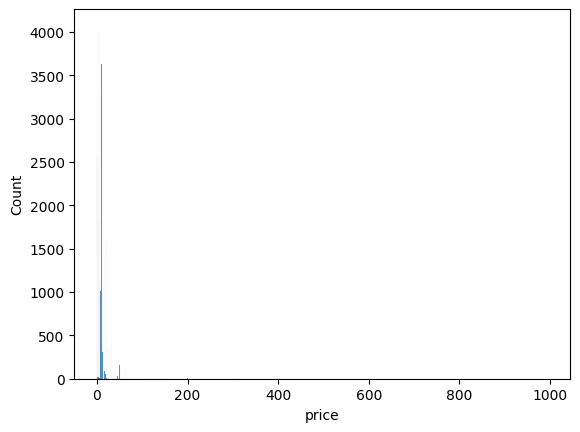

In [ ]:
sns.histplot(data_steam_games.price)
plt.show()

In [ ]:
data_steam_games.price = data_steam_games.query('price>@BI_Cal and price<@BS_Cal').price

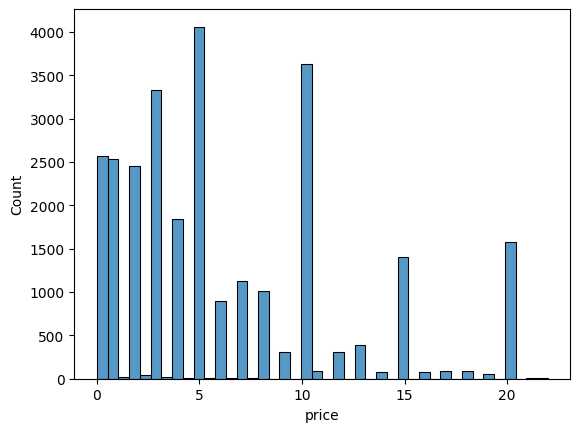

In [ ]:
sns.histplot(data_steam_games.price)
plt.show()

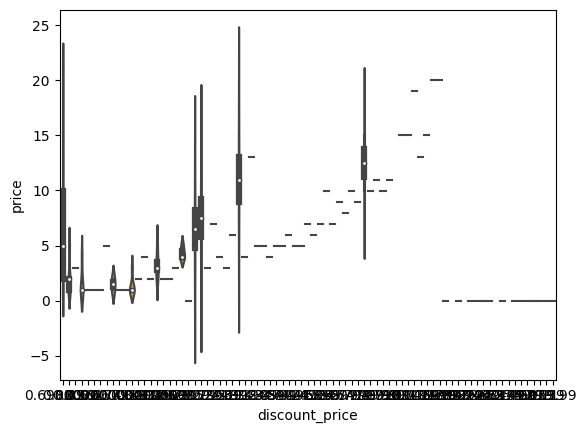

In [ ]:
sns.violinplot(x='discount_price',y='price',data=data_steam_games,split=True)
plt.show()

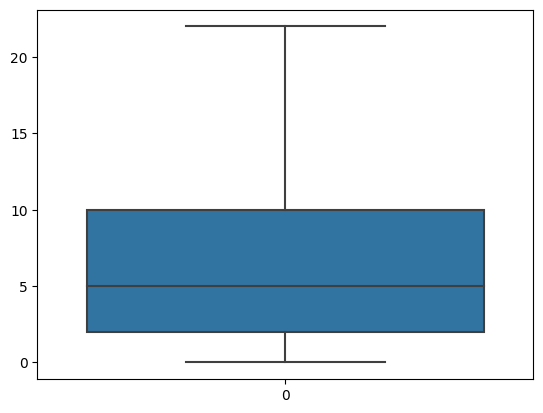

In [ ]:
sns.boxplot(data_steam_games.price)
plt.show()